# Huấn luyện mô hình học máy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from io import StringIO

## Khai phá dữ liệu

In [3]:
df = pd.read_excel('Data/data_hue.xlsx')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20180 entries, 0 to 20179
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Địa hình          20180 non-null  object
 1   Mức thu nhập      20180 non-null  object
 2   Số lượng người    20180 non-null  object
 3   Thời gian         20180 non-null  object
 4   Mục đích du lịch  20180 non-null  object
 5   Địa điểm          20180 non-null  object
 6   Đánh giá          20180 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.1+ MB


,Địa hình,Mức thu nhập,Số lượng người,Thời gian,Mục đích du lịch,Địa điểm,Đánh giá
0,Núi,15-30 triệu,Cặp đôi,Hè,Trải nghiệm,Nhà vườn Huế,0
1,Biển,Trên 30 triệu,Cặp đôi,Thu,Tìm hiểu văn hóa,Phá Tam Giang,1
2,Núi,5-15 triệu,Nhóm 6-10,Thu,Trải nghiệm,Đại Nội Huế,3
3,Thành phố,15-30 triệu,Nhóm 6-10,Thu,Tìm hiểu lịch sử,Biển Lăng Cô,1
4,Thành phố,Dưới 5 triệu,Một mình,Hè,Trải nghiệm,Đèo Hải Vân,2
...,...,...,...,...,...,...,...
20175,Thành phố,15-30 triệu,Hơn 10 người,Hè,Tìm hiểu văn hóa,Đèo Hải Vân,1
20176,Thành phố,Dưới 5 triệu,Cặp đôi,Hè,Nghỉ dưỡng,Núi Bạch Mã,3
20177,Thành phố,5-15 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Phố đi bộ Huế,4
20178,Thành phố,5-15 triệu,Nhóm 6-10,Thu,Trải nghiệm,Đại Nội Huế,4


In [4]:
df = df.drop_duplicates()
df.to_excel('Data/data_xu_li_hue.xlsx', index=False)

In [5]:
data = pd.read_excel('Data/data_xu_li_hue.xlsx')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14505 entries, 0 to 14504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Địa hình          14505 non-null  object
 1   Mức thu nhập      14505 non-null  object
 2   Số lượng người    14505 non-null  object
 3   Thời gian         14505 non-null  object
 4   Mục đích du lịch  14505 non-null  object
 5   Địa điểm          14505 non-null  object
 6   Đánh giá          14505 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 793.4+ KB


,Địa hình,Mức thu nhập,Số lượng người,Thời gian,Mục đích du lịch,Địa điểm,Đánh giá
0,Núi,15-30 triệu,Cặp đôi,Hè,Trải nghiệm,Nhà vườn Huế,0
1,Biển,Trên 30 triệu,Cặp đôi,Thu,Tìm hiểu văn hóa,Phá Tam Giang,1
2,Núi,5-15 triệu,Nhóm 6-10,Thu,Trải nghiệm,Đại Nội Huế,3
3,Thành phố,15-30 triệu,Nhóm 6-10,Thu,Tìm hiểu lịch sử,Biển Lăng Cô,1
4,Thành phố,Dưới 5 triệu,Một mình,Hè,Trải nghiệm,Đèo Hải Vân,2
...,...,...,...,...,...,...,...
14500,Núi,15-30 triệu,Một mình,Thu,Tìm hiểu văn hóa,Đồi Thiên An – Hồ Thuỷ Tiên,2
14501,Biển,Trên 30 triệu,Hơn 10 người,Đông,Trải nghiệm,Chợ Đông Ba,3
14502,Thành phố,15-30 triệu,Hơn 10 người,Hè,Tìm hiểu văn hóa,Đèo Hải Vân,1
14503,Thành phố,Dưới 5 triệu,Cặp đôi,Hè,Nghỉ dưỡng,Núi Bạch Mã,3


[Text(0, 0, '1256'),
 Text(0, 0, '3921'),
 Text(0, 0, '5094'),
 Text(0, 0, '3149'),
 Text(0, 0, '963'),
 Text(0, 0, '122')]

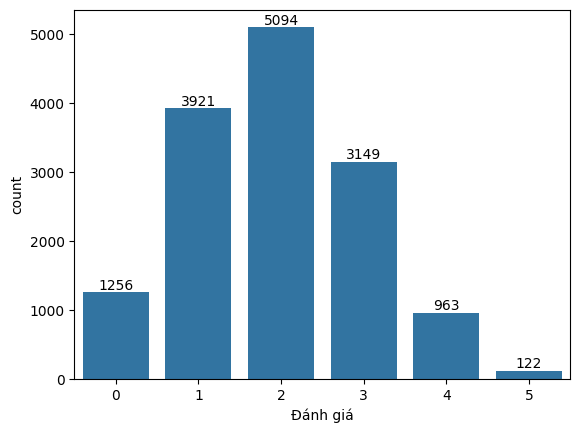

In [14]:
ax = sns.countplot(x='Đánh giá', data=data)
ax.bar_label(ax.containers[0])

In [20]:
# Phân chia bộ dữ liệu
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data[['Địa hình',
                      'Mức thu nhập',
                      'Số lượng người',
                      'Thời gian',
                      'Mục đích du lịch',
                      'Địa điểm']]
y_train = train_data['Đánh giá']
X_test = test_data[['Địa hình',
                      'Mức thu nhập',
                      'Số lượng người',
                      'Thời gian',
                      'Mục đích du lịch',
                      'Địa điểm']]
y_test = test_data['Đánh giá']

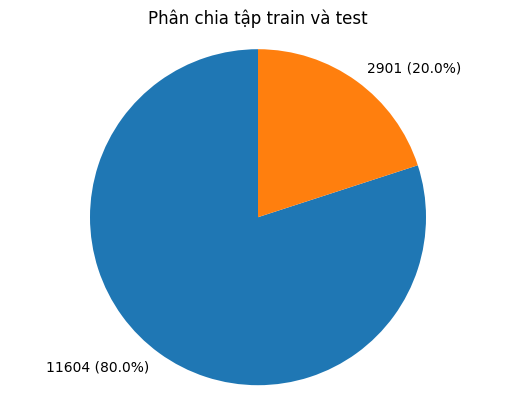

In [7]:
import matplotlib.pyplot as plt

# Đếm số lượng mẫu trong tập train và test
train_size = len(X_train)
test_size = len(X_test)

# Tạo một danh sách chứa các nhãn của các tập
labels = ['Train', 'Test']

# Tạo một danh sách chứa số lượng mẫu tương ứng
sizes = [train_size, test_size]

# Tính tỷ lệ phần trăm
percentages = [f'{size} ({size/sum(sizes)*100:.1f}%)' for size in sizes]

# Vẽ đồ thị hình tròn
plt.pie(sizes, labels=percentages, autopct='', startangle=90)
plt.axis('equal')  # Giữ cho đồ thị hình tròn
plt.title('Phân chia tập train và test')
plt.show()


[Text(0, 0, '1004'),
 Text(0, 0, '3131'),
 Text(0, 0, '4082'),
 Text(0, 0, '2508'),
 Text(0, 0, '779'),
 Text(0, 0, '100')]

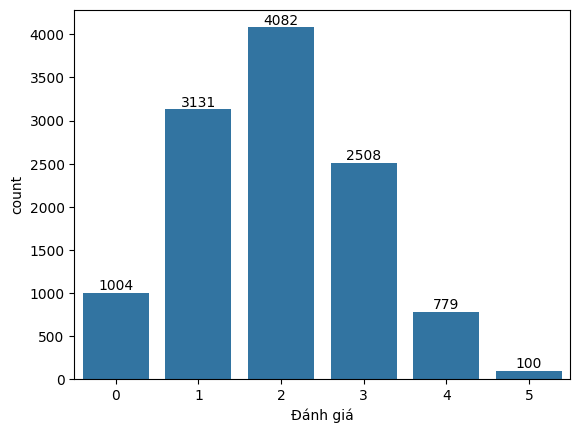

In [8]:
y_train_df = pd.DataFrame({'Đánh giá': y_train})
ax = sns.countplot(data=y_train_df, x= 'Đánh giá')
ax.bar_label(ax.containers[0])

In [21]:
# Mã hóa dữ liệu
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Lưu bộ mã hóa
joblib.dump(encoder, 'Models/encoder.joblib')

d:\Apps\Miniconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['Models/encoder.joblib']

In [40]:
columns = encoder.get_feature_names_out()
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=columns)
y_train_encoded_df = pd.DataFrame({'Đánh giá': y_train})
# Lưu DataFrame vào file Excel
encoded_df = pd.concat([X_train_encoded_df, y_train_encoded_df.reset_index()],axis=1).drop('index',axis=1)
encoded_df.to_excel('Data/data_encoder_hue.xlsx', index=False)

In [41]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11604 entries, 0 to 11603
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Địa hình_Núi                                11604 non-null  float64
 1   Địa hình_Thành phố                          11604 non-null  float64
 2   Mức thu nhập_5-15 triệu                     11604 non-null  float64
 3   Mức thu nhập_Dưới 5 triệu                   11604 non-null  float64
 4   Mức thu nhập_Trên 30 triệu                  11604 non-null  float64
 5   Số lượng người_Hơn 10 người                 11604 non-null  float64
 6   Số lượng người_Một mình                     11604 non-null  float64
 7   Số lượng người_Nhóm 3-5                     11604 non-null  float64
 8   Số lượng người_Nhóm 6-10                    11604 non-null  float64
 9   Thời gian_Thu                               11604 non-null  float64
 10  Thời gian_

In [10]:
# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_train_resample, y_train_resample = smote.fit_resample(
                                            X_train_encoded,
                                            y_train)

[Text(0, 0, '4082'),
 Text(0, 0, '4082'),
 Text(0, 0, '4082'),
 Text(0, 0, '4082'),
 Text(0, 0, '4082'),
 Text(0, 0, '4082')]

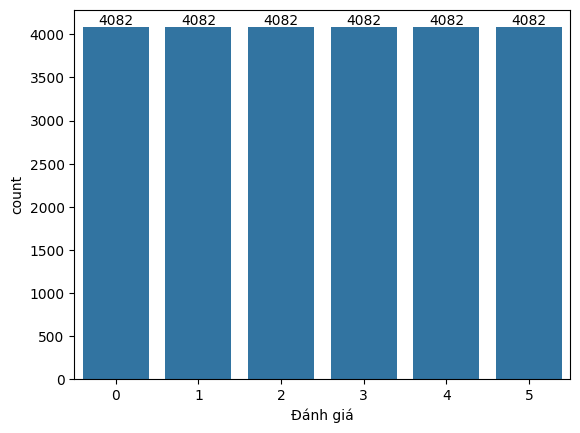

In [16]:
columns = encoder.get_feature_names_out()
X_train_df = pd.DataFrame(X_train_resample, columns=columns)
y_train_df = pd.DataFrame({'Đánh giá': y_train_resample})
# Lưu DataFrame vào file Excel
train_df = pd.concat([X_train_df, y_train_df], axis=1)
train_df.to_excel('Data/data_train_hue.xlsx', index=False)
ax = sns.countplot(data=y_train_df, x= 'Đánh giá')
ax.bar_label(ax.containers[0])

In [17]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Địa hình_Núi                                24492 non-null  float64
 1   Địa hình_Thành phố                          24492 non-null  float64
 2   Mức thu nhập_5-15 triệu                     24492 non-null  float64
 3   Mức thu nhập_Dưới 5 triệu                   24492 non-null  float64
 4   Mức thu nhập_Trên 30 triệu                  24492 non-null  float64
 5   Số lượng người_Hơn 10 người                 24492 non-null  float64
 6   Số lượng người_Một mình                     24492 non-null  float64
 7   Số lượng người_Nhóm 3-5                     24492 non-null  float64
 8   Số lượng người_Nhóm 6-10                    24492 non-null  float64
 9   Thời gian_Thu                               24492 non-null  float64
 10  Thời gian_

## Hiệu chỉnh tham số các mô hình học máy

In [19]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid_search.fit(X_train_encoded, y_train)

# Lưu model grid_search
joblib.dump(dt_grid_search, 'Models/grid_search_dt_model.joblib')
# Lấy thông tin chi tiết về các trường hợp xác thực
dt_results_df = pd.DataFrame(dt_grid_search.cv_results_)
dt_results_df.to_excel('Results/grid_search_dt_result.xlsx', index = False)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [21]:
# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_encoded, y_train)

# Lưu model grid_search
joblib.dump(rf_grid_search, 'Models/grid_search_rf_model.joblib')
# Lấy thông tin chi tiết về các trường hợp xác thực
rf_results_df = pd.DataFrame(rf_grid_search.cv_results_)
rf_results_df.to_excel('Results/grid_search_rf_result.xlsx', index = False)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [23]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_encoded, y_train)

# Lưu model grid_search
joblib.dump(xgb_grid_search, 'Models/grid_search_xgb_model.joblib')
# Lấy thông tin chi tiết về các trường hợp xác thực
xgb_results_df = pd.DataFrame(xgb_grid_search.cv_results_)
xgb_results_df.to_excel('Results/grid_search_xgb_result.xlsx', index = False)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [25]:
# Support Vector Machine
svm_model = SVC(random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
}

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train_encoded, y_train)

# Lưu model grid_search
joblib.dump(svm_grid_search, 'Models/grid_search_svm_model.joblib')
# Lấy thông tin chi tiết về các trường hợp xác thực
svm_results_df = pd.DataFrame(svm_grid_search.cv_results_)
svm_results_df.to_excel('Results/grid_search_svm_result.xlsx', index = False)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [27]:
# Đánh giá độ chính xác trên tập test
dt_predictions = dt_grid_search.predict(X_test_encoded)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)

# Đánh giá độ chính xác trên tập test
rf_predictions = rf_grid_search.predict(X_test_encoded)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')
print("Best Random Forest Parameters:", rf_grid_search.best_params_)

# Đánh giá độ chính xác trên tập test
xgb_predictions = xgb_grid_search.predict(X_test_encoded)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}')
print("Best XGBoost Parameters:", xgb_grid_search.best_params_)

# Đánh giá độ chính xác trên tập test
svm_predictions = svm_grid_search.predict(X_test_encoded)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}')
print("Best SVM Parameters:", svm_grid_search.best_params_)

Decision Tree Accuracy: 0.7736696613683484
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest Accuracy: 0.6931582584657913
Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
XGBoost Accuracy: 0.7964754664823773
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
SVM Accuracy: 0.9882515549412578
Best SVM Parameters: {'C': 10, 'kernel': 'rbf'}


## Đánh giá mô hình

[Text(0, 0, '245'),
 Text(0, 0, '793'),
 Text(0, 0, '972'),
 Text(0, 0, '657'),
 Text(0, 0, '187'),
 Text(0, 0, '17')]

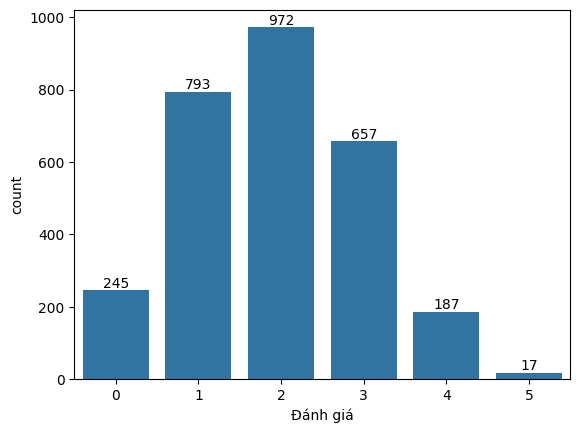

In [27]:
y_test_df = pd.DataFrame({'Đánh giá': y_test})
ax = sns.countplot(data=y_test_df, x= 'Đánh giá')
ax.bar_label(ax.containers[0])

Decision Tree Accuracy: 0.7666318355973528, Time: 0.08833432197570801s
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       245
           1       0.77      0.78      0.77       793
           2       0.76      0.76      0.76       972
           3       0.77      0.76      0.77       657
           4       0.74      0.76      0.75       187
           5       0.61      0.65      0.63        17

    accuracy                           0.77      2871
   macro avg       0.74      0.75      0.74      2871
weighted avg       0.77      0.77      0.77      2871



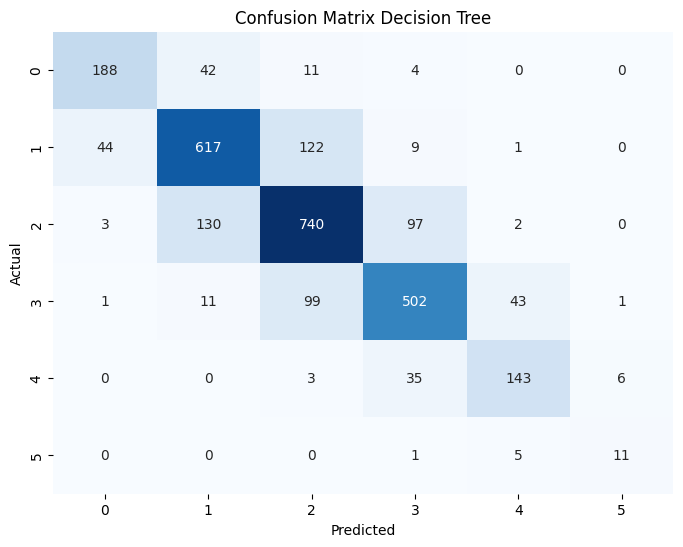

In [46]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42,
                                  criterion= 'gini',
                                  max_depth= None,
                                  min_samples_leaf= 1,
                                  min_samples_split= 2)
start_time = time.time()
dt_model.fit(X_train_encoded, y_train)
end_time = time.time()
execution_time = end_time - start_time
dt_predictions = dt_model.predict(encoder.transform(X_test))
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}, Time: {execution_time}s')
joblib.dump(dt_model, 'Models/best_dt_model.joblib')

report = classification_report(y_test, dt_predictions)
report_df = pd.read_fwf(StringIO(report), index_col=0)
report_df.to_excel('results/report_dt.xlsx')
print(report)

cm_df = pd.DataFrame(confusion_matrix(y_test, dt_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Accuracy: 0.6572622779519331, Time: 5.070810317993164s
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       245
           1       0.69      0.71      0.70       793
           2       0.60      0.73      0.66       972
           3       0.65      0.58      0.61       657
           4       0.74      0.43      0.55       187
           5       0.80      0.24      0.36        17

    accuracy                           0.66      2871
   macro avg       0.73      0.55      0.60      2871
weighted avg       0.67      0.66      0.66      2871



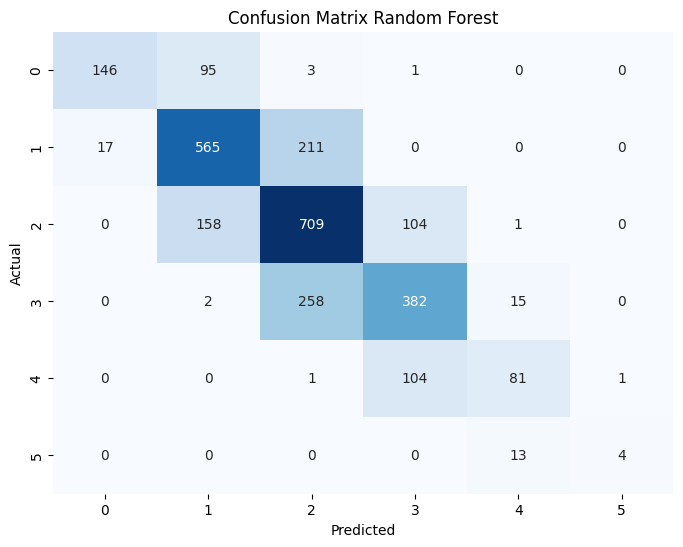

In [47]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42,
                                max_depth= None,
                                 min_samples_split= 2,
                                 n_estimators= 150)
start_time = time.time()
rf_model.fit(X_train_encoded, y_train)
end_time = time.time()
execution_time = end_time - start_time
rf_predictions = rf_model.predict(encoder.transform(X_test))
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}, Time: {execution_time}s')
joblib.dump(rf_model, 'Models/best_rf_model.joblib')

report = classification_report(y_test, rf_predictions)
# Chuyển đổi classification report thành DataFrame
report_df = pd.read_fwf(StringIO(report), index_col=0)
report_df.to_excel('results/report_rf.xlsx')
print(report)

cm_df = pd.DataFrame(confusion_matrix(y_test, rf_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBoost Accuracy: 0.7990247300592128, Time: 1.317885160446167s
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       245
           1       0.84      0.85      0.85       793
           2       0.76      0.86      0.81       972
           3       0.77      0.72      0.74       657
           4       0.75      0.53      0.62       187
           5       1.00      0.53      0.69        17

    accuracy                           0.80      2871
   macro avg       0.84      0.72      0.76      2871
weighted avg       0.80      0.80      0.80      2871



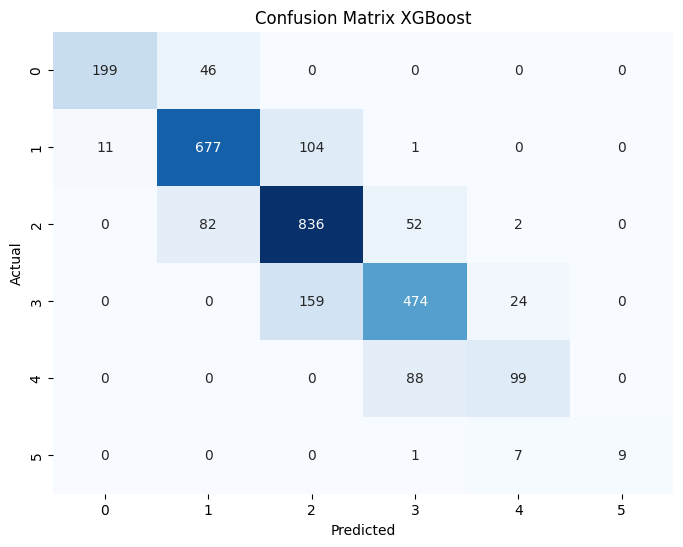

In [49]:
# XGBoost
xgb_model = XGBClassifier(random_state=42,
                        learning_rate= 0.2,
                        max_depth= 7,
                        n_estimators= 150)
start_time = time.time()
xgb_model.fit(X_train_encoded, y_train)
end_time = time.time()
execution_time = end_time - start_time
xgb_predictions = xgb_model.predict(encoder.transform(X_test))
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}, Time: {execution_time}s')
joblib.dump(xgb_model, 'Models/best_xgb_model.joblib')

report = classification_report(y_test, xgb_predictions)
# Chuyển đổi classification report thành DataFrame
report_df = pd.read_fwf(StringIO(report), index_col=0)
report_df.to_excel('results/report_xgb.xlsx')
print(report)

cm_df = pd.DataFrame(confusion_matrix(y_test, xgb_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Accuracy: 0.9864158829676071, Time: 22.824801206588745s
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       245
           1       0.99      1.00      1.00       793
           2       0.99      1.00      0.99       972
           3       0.98      0.98      0.98       657
           4       0.96      0.93      0.94       187
           5       0.77      0.59      0.67        17

    accuracy                           0.99      2871
   macro avg       0.95      0.91      0.93      2871
weighted avg       0.99      0.99      0.99      2871



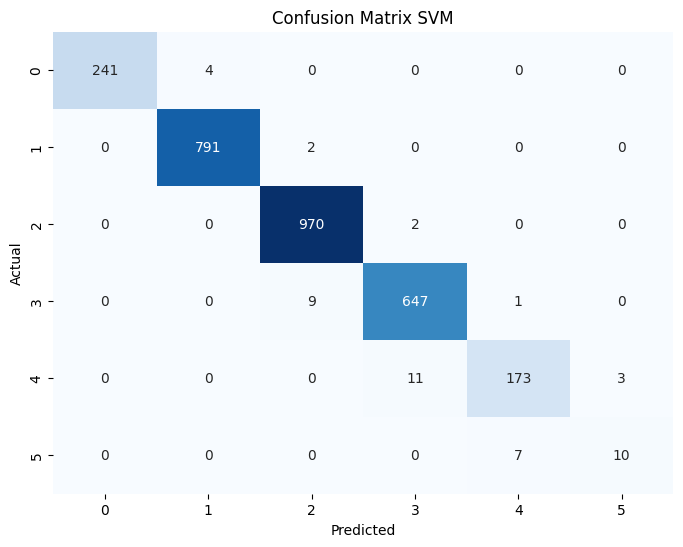

In [52]:
# Support Vector Machine
svm_model = SVC(random_state=42, C= 10, kernel= 'rbf')
start_time = time.time()
svm_model.fit(X_train_encoded, y_train)
end_time = time.time()
execution_time = end_time - start_time
svm_predictions = svm_model.predict(encoder.transform(X_test))
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f'SVM Accuracy: {svm_accuracy}, Time: {execution_time}s')
joblib.dump(svm_model, 'Models/best_svm_model.joblib')

report = classification_report(y_test, svm_predictions)
# Chuyển đổi classification report thành DataFrame
report_df = pd.read_fwf(StringIO(report), index_col=0)
report_df.to_excel('results/report_svm.xlsx')
print(report)

cm_df = pd.DataFrame(confusion_matrix(y_test, svm_predictions))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Thử nghiệm mô hình học máy

In [88]:
# Load mô hình đã được huấn luyện
loaded_model = joblib.load('Models/model.joblib')
loaded_encoder = joblib.load('Models/encoder.joblib')

In [89]:
dia_diem =  ["Đồi Thiên An – Hồ Thuỷ Tiên", "Núi Bạch Mã", "Chùa Huyền Không Sơn Thượng", "Biển Lăng Cô", "Biển Thuận An", "Khu nghỉ dưỡng Banyan Tree", "Khu nghỉ dưỡng Pilgrimage Village", "Chùa Thiên Mụ", "Chùa Từ Đàm", "Bảo tàng Mỹ thuật Cung đình Huế", "Thiền viện Trúc Lâm Bạch Mã", "Nhà vườn Huế", "Lăng tẩm Huế", "Cầu Tràng Tiền", "Đại Nội Huế", "Sông Hương", "Phá Tam Giang", "Phố đi bộ Huế", "Chợ Đông Ba", "Đèo Hải Vân"]

results = pd.DataFrame(columns=["Địa hình","Mức thu nhập", "Số lượng người", "Thời gian", "Mục đích du lịch","Địa điểm", "Đánh giá"])

# Dự đoán trên dữ liệu mới
for i in dia_diem:
    new_data = pd.DataFrame({
        'Địa hình': ['Biển'],
        'Mức thu nhập': ['Trên 30 triệu'],
        'Số lượng người': ['Nhóm 6-10'],
        'Thời gian': ['Hè'],
        'Mục đích du lịch': ['Nghỉ dưỡng'],
        'Địa điểm': [i],
    })

    # Mã hóa dữ liệu mới
    new_data_encoded = loaded_encoder.transform(new_data)

    # Dự đoán trên dữ liệu mới
    new_predictions = loaded_model.predict(new_data_encoded)

    # In dự đoán
    new_data['Đánh giá'] = new_predictions[0]
    results = pd.concat([results, new_data], ignore_index=True)
results = results.sort_values(by='Đánh giá', ascending=False)
results.reset_index()

,index,Địa hình,Mức thu nhập,Số lượng người,Thời gian,Mục đích du lịch,Địa điểm,Đánh giá
0,4,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Biển Thuận An,4
1,5,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Khu nghỉ dưỡng Banyan Tree,4
2,6,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Khu nghỉ dưỡng Pilgrimage Village,4
3,3,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Biển Lăng Cô,3
4,17,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Phố đi bộ Huế,3
5,16,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Phá Tam Giang,3
6,0,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Đồi Thiên An – Hồ Thuỷ Tiên,2
7,18,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Chợ Đông Ba,2
8,1,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Núi Bạch Mã,2
9,14,Biển,Trên 30 triệu,Nhóm 6-10,Hè,Nghỉ dưỡng,Đại Nội Huế,2
